In [1]:
import numpy as np
from models.linear import LinearRegression
from models.logistic import LogisticRegression
from metrics.classification_metrics import *

In [2]:
from sklearn import datasets

iris = datasets.load_iris()

X = iris.data
Y = iris.target

In [3]:
#n_samples = 500
#np.random.seed(42)

#classes = ["A", "B", "C", "D"]

#random_classes = np.random.choice(classes, size=n_samples)


#class_to_int = {label: idx for idx, label in enumerate(classes)}
#random_classes_int = np.vectorize(class_to_int.get)(random_classes)

In [4]:
#X = np.random.normal(2, 2, n_samples)
#Z = np.random.normal(9, 1, n_samples) 
#P = np.random.beta(1, 2, n_samples)

#Y = 2*X +  np.random.normal(0, 0.5, n_samples) + P + Z + random_classes_int * X 

#X= np.column_stack((X,X**2, Z + X, X * P, P, random_classes_int))

In [5]:
reg = LinearRegression(regularization="None").fit(X,Y)
ridge = LinearRegression(regularization="Ridge").fit(X,Y)
lasso = LinearRegression(regularization="Lasso", n_iter = 10000, lr=0.001).fit(X,Y)
elastic = LinearRegression(regularization="ElasticNet", n_iter = 10000, lr=0.001, alpha=0.4).fit(X,Y)

In [6]:
elastic_pred = elastic.predict(X)
elastic.print_errors(Y, elastic_pred), lasso.print_errors(Y, lasso.predict(X)), ridge.print_errors(Y, ridge.predict(X))
elastic.score(X, Y), lasso.score(X, Y), ridge.score(X, Y)

╒══════════╤═════════╕
│ Metric   │   Value │
╞══════════╪═════════╡
│ MAE      │  0.3021 │
├──────────┼─────────┤
│ RMSE     │  0.3402 │
├──────────┼─────────┤
│ MSE      │  0.1157 │
╘══════════╧═════════╛
╒══════════╤═════════╕
│ Metric   │   Value │
╞══════════╪═════════╡
│ MAE      │  0.1991 │
├──────────┼─────────┤
│ RMSE     │  0.2496 │
├──────────┼─────────┤
│ MSE      │  0.0623 │
╘══════════╧═════════╛
╒══════════╤═════════╕
│ Metric   │   Value │
╞══════════╪═════════╡
│ MAE      │  0.1652 │
├──────────┼─────────┤
│ RMSE     │  0.2155 │
├──────────┼─────────┤
│ MSE      │  0.0464 │
╘══════════╧═════════╛


(Array(0.82640946, dtype=float32),
 Array(0.9065708, dtype=float32),
 np.float64(0.9303484478324595))

In [7]:
reg.do_all(X, Y)

Model score:0.9303939218549563
R adjusted:0.906069897754173
Beta: [ 0.18649525 -0.11190585 -0.04007949  0.22864503  0.60925205]
Cross validation score: {'MAE': 0.1706, 'RMSE': 0.2201, 'MSE': 0.0489, 'R2': 0.924}
        The Ramsey RESET test for linearity
        Test Statistic : 21.3944 
        P-value        : 0.0 
        Interpretation : Model may be misspecified (nonlinearity exists) ❌ 
        
        Breusch-Pagan Test for Heteroscedasticity
        Test Statistic : 32.3809
        P-value        : 0.0
        Interpretation : Heteroscedasticity detected — variance of residuals is not constant. ❌
        
        Durbin-Watson Test for Independence of Errors
        DW Statistic  : 1.0767
        Interpretation: Possible positive autocorrelation ❌ 
        
        VIF Test for Multicollinearity
        Feature 1: VIF = 7.072722013939539 | Multicollinearity ❌
        Feature 2: VIF = 2.100871676124254 | No Multicollinearity ✅
        Feature 3: VIF = 31.26149777492164 | Multic

In [8]:
reg.Cooks_distance(X,Y)

array([7.87187450e-04, 2.29645347e-04, 2.68422712e-04, 1.92947423e-05,
       7.26535645e-04, 6.19417900e-04, 2.10323282e-04, 2.06176155e-04,
       6.41381761e-05, 8.41947608e-04, 1.63271521e-03, 8.05991834e-08,
       1.07920432e-03, 1.80193118e-03, 1.93374830e-02, 7.02795700e-04,
       2.81392339e-04, 5.73183908e-05, 2.13786604e-04, 1.92066328e-05,
       2.54745230e-04, 4.27117929e-04, 2.56091470e-03, 3.73359977e-03,
       1.14319246e-03, 3.97697686e-06, 1.02111783e-03, 5.92175675e-04,
       1.04229000e-03, 5.10224146e-05, 1.79561621e-05, 2.22972687e-04,
       8.76278451e-03, 7.58813470e-03, 4.96724891e-05, 1.81407963e-03,
       5.39134187e-03, 2.59246738e-03, 7.64680858e-06, 3.29861506e-04,
       1.45449586e-04, 2.45173628e-03, 3.63587932e-05, 8.34823588e-03,
       4.12251420e-03, 1.50972241e-04, 4.85811034e-04, 2.63365136e-05,
       1.20633065e-03, 4.32373981e-04, 8.37998537e-03, 4.80632057e-03,
       1.56820233e-02, 5.90939340e-03, 1.09370604e-02, 1.06350355e-02,
      

In [9]:
#classes = ["A", "B", "C"]
#n_samples = 150

#random_classes = np.random.choice(classes, size=n_samples)


#class_to_int = {label: idx for idx, label in enumerate(classes)}
#random_classes_int = np.vectorize(class_to_int.get)(random_classes)

#X = np.random.normal(2, 2, n_samples)
#Z = np.random.normal(9, 1, n_samples) 
#P = np.random.beta(1, 2, n_samples)


#X= np.column_stack((Z, X))

#Y = random_classes_int

from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#X = scaler.fit_transform(X)

In [10]:
import pandas as pd

#X = pd.DataFrame(X, columns=["1","2","3","4","5"])

In [11]:

log = LogisticRegression(X.shape[1], 
                         len(np.unique(Y)), 
                         regularization="elastic_net", 
                         solver="LBFGS",
                         l2_ratio=0.5,
                         l1_ratio= 0.9,
                         lr=1, 
                         n_iter = 100,
                         random_state = 0)
log.fit(X, Y)

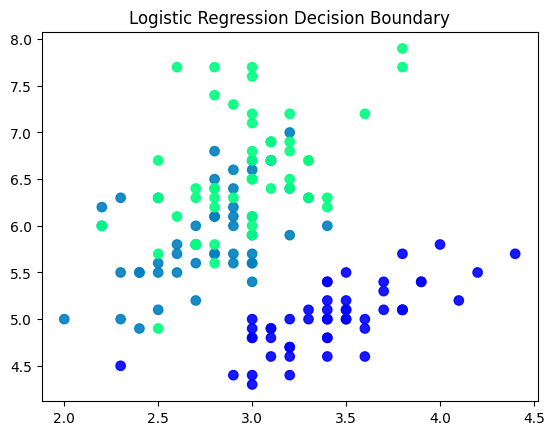

In [12]:
pred = log.predict(X)
pred
balanced_accuracy(Y, pred)
log.plot(1,0)

In [13]:
log.theta

array([ 0.96663209, -5.05209653,  3.19421893,  4.14414579, -3.34948379,
        0.4996449 ,  1.83928096, -3.11709592,  0.42800745,  1.34677307,
       -1.93857945,  1.59368853,  0.74931308, -0.90286313,  0.60629068])

In [14]:
from models.onevsall import OVA
from models.svm import SVMClassificator
for i in range(0, 18):
    ova = OVA(SVMClassificator(kernel="rbf", n_iter=i, lr=0.01 , C=i, r=1, degree=2 )).fit(X,Y)

    print(balanced_accuracy(Y, ova.predict(X)), i)

0.96 0
0.96 1
0.6933333333333334 2
0.9066666666666666 3
0.56 4
0.8933333333333332 5
0.56 6
0.8799999999999999 7
0.56 8
0.8666666666666666 9
0.5733333333333334 10
0.8533333333333334 11
0.5733333333333334 12
0.8533333333333334 13
0.5733333333333334 14
0.84 15
0.5733333333333334 16
0.8266666666666667 17


Svm model should be used with two classes, use One vs All approach for multicalss problems.
0.6666666666666666


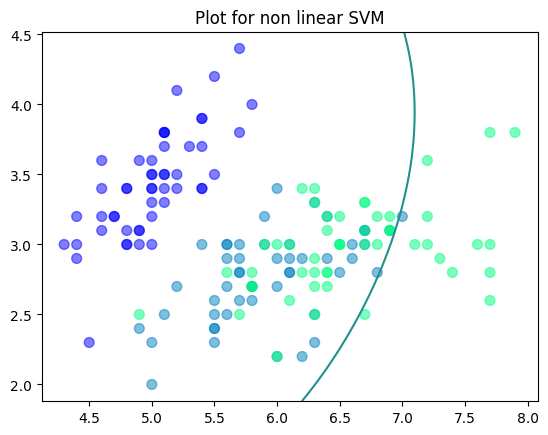

In [15]:
svm = SVMClassificator(kernel="rbf", n_iter=100, lr=0.01 , C=1, r=1, gamma=0.4).fit(X,Y)
svm.predict(X)
print(balanced_accuracy(Y, svm.predict(X)))
svm.plot(0,1)

In [16]:
from models.decision_trees import DecisionTreeClassifier
from models.onevsone import OVO

tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X, Y)

print(balanced_accuracy(Y, tree.predict(X)))
print(confusion_matrix(Y, tree.predict(X)))

0.98
[[50.  0.  0.]
 [ 0. 49.  1.]
 [ 0.  2. 48.]]


In [17]:
from models.decision_trees import DecisionTreeRegressor
from metrics.regression_metrics import *

tree = DecisionTreeRegressor(max_depth = 5)
tree.fit(X, Y)


print(MSE(Y, tree.predict(X)))
print(MAE(Y, tree.predict(X)))
print(RMSE(Y, tree.predict(X)))


0.012222222222222223
0.024444444444444446
0.11055415967851333


In [18]:
from models.votingclassifier import VotingClassifier

votes = VotingClassifier(
    estimators = [
        DecisionTreeClassifier(max_depth = 5),
        LogisticRegression(X.shape[1], 
                         len(np.unique(Y)), 
                         regularization="elastic_net", 
                         solver="LBFGS",
                         l2_ratio=0.5,
                         l1_ratio= 0.9,
                         lr=1, 
                         n_iter = 100,
                         random_state = 0),
        LogisticRegression(X.shape[1], 
                         len(np.unique(Y)), 
                         regularization="l1", 
                         solver="LBFGS",
                         #l2_ratio=0.5,
                         l1_ratio= 0.09,
                         lr=1, 
                         n_iter = 100,
                         random_state = 2),
        LogisticRegression(X.shape[1], 
                         len(np.unique(Y)), 
                         #regularization="elastic_net", 
                         solver="LBFGS",
                         #l2_ratio=0.5,
                         #l1_ratio= 0.9,
                         lr=0.01, 
                         n_iter = 100,
                         random_state = 2)
        ],
        soft_votting = False 
)

votes.fit(X, Y)
preds = votes.predict(X)
print(balanced_accuracy(Y, preds))
print(confusion_matrix(Y, preds))

Converged at iteration 33, Δloss = 0.000039
0.98
[[50.  0.  0.]
 [ 0. 49.  1.]
 [ 0.  2. 48.]]


In [19]:
from models.bagging import BaggingClassifier

bagging = BaggingClassifier(
    LogisticRegression, 
    n_splits = 2,
    soft_voting = True,
    #max_depth = 5,
    replacement=False,
    n_features=X.shape[1], 
    n_classes=len(np.unique(Y)),
    solver="LBFGS"

)

bagging.fit(X, Y)
preds = bagging.predict(X)
print(balanced_accuracy(Y, preds))
print(confusion_matrix(Y, preds))


Converged at iteration 27, Δloss = 0.000052
Converged at iteration 24, Δloss = 0.000049
0.9733333333333333
[[50.  0.  0.]
 [ 0. 46.  4.]
 [ 0.  0. 50.]]
